# AGH Modelling of Physical Systems Lab 2

## Import of necessary libraries

In [67]:
import pint
from scipy.constants import pi
import numpy as np
import matplotlib.pyplot as plt
from open_atmos_jupyter_utils import show_plot

plt.style.use('dark_background')

## Theoretical Introduction

In many physical and environmental processes, the transport of a substance through a medium is influenced by two primary mechanisms: **advection** and **diffusion**. The **advection-diffusion equation** models this transport by describing how the concentration of a substance changes over time due to both bulk motion (advection) and random molecular movement (diffusion). This equation is widely used in fields such as fluid dynamics, environmental science, and chemical engineering to predict pollutant dispersion, heat transfer, and other transport phenomena.  

### Mathematical Model

The **advection-diffusion equation** is expressed as:

$$ 
\frac{\partial c}{\partial t} + U\frac{\partial c}{\partial x} = D\frac{\partial^2 c}{\partial x^2} 
$$

where:  
- $c(x, t)$ is the concentration of the substance as a function of position $x$ and time $t$,  
- $U$ is the advection velocity (unit: $\text{m/s}$),  
- $D$ is the diffusion coefficient (unit: $\text{m}^2/\text{s}$),  
- $\frac{\partial c}{\partial t}$ represents the change in concentration over time,  
- $U \frac{\partial c}{\partial x}$ accounts for advection (transport due to bulk flow),  
- $D \frac{\partial^2 c}{\partial x^2}$ represents diffusion (spreading due to molecular motion).  

This equation balances the **local concentration change** with the effects of **transport and spreading**.  

### Type of Solution  

For simple cases with well-defined initial and boundary conditions, an **analytical solution** can be derived. In this case, we consider an **impulse-like initial condition**, where a known mass $M$ of a substance is introduced at an initial location and spreads over time. The solution for concentration $c(x,t)$ is given by:

$$
c(x, t) = \frac{M}{A \cdot 2 \sqrt{\pi D t^3}} \cdot x \cdot \exp\left( -\frac{(Ut - x)^2}{4Dt} \right)
$$

where:  
- $M$ is a total amount of substance (unit: $kg$),
- $A$ is an empirical coefficient (unit: $m^3/s$),  
- The **fractional term** scales the solution based on system properties,  
- The **exponential term** models diffusion as a Gaussian distribution, centered at $x = Ut$, showing how advection shifts the peak while diffusion spreads the substance over time.  

Since the function involves a Gaussian, it ensures that concentration decreases symmetrically from its peak, illustrating how diffusion dominates over time. While **analytical solutions** provide direct mathematical expressions, in more complex cases (e.g., irregular boundaries or varying $D$ and $U$), **numerical simulations** are required.  

### Context  

This model is relevant in multiple real-world applications, including:  
- **Pollutant transport in rivers and air**: Predicting how contaminants spread in water bodies or the atmosphere.  
- **Heat conduction**: Understanding how temperature changes in a medium.  
- **Drug diffusion in biological systems**: Modeling how a drug disperses in tissue.    


## Code Basis
### Initialization of the Unit Registry

In [ ]:
# Define unit registry
ureg = pint.UnitRegistry()

ureg.setup_matplotlib()

### Calculation of the Concentration

In [69]:
def concentration_profile(
    M: float = 1.0 * ureg.kilogram,
    A: float = 1.0 * ureg.meter**3 / ureg.second,
    D: float = 0.01 * ureg.meter**2 / ureg.second,
    U: float = 0.1 * ureg.meter / ureg.second,
    x: np.ndarray = np.linspace(0, 10, 200) * ureg.meter,
    t: np.ndarray = np.linspace(0.1, 100, 100) * ureg.second,
) -> np.ndarray:
    """
    Computes the analytical solution of the advection-diffusion equation.

    Parameters:
    M (float): Total mass of the substance (kg)
    A (float): Empirical coefficient or volumetric flow rate (m^3/s)
    D (float): Diffusion coefficient (m^2/s)
    U (float): Advection velocity (m/s)
    x (np.ndarray): Spatial positions (m)
    t (float): Time at which the concentration is computed (s)

    Returns:
    np.ndarray: Concentration values at each spatial position (kg/m^3)
    """
    X, T = np.meshgrid(x, t)
    prefactor = (M / A) * (1 / (2 * (pi * D)**0.5))
    exp_term = np.exp(-((U * T - X)**2 / (4 * D * T)))
    c_xt = prefactor * exp_term * (X / T**(1.5))
    return c_xt


In [84]:
n = 500

t = np.linspace(0.1, 100.1, n) * ureg.second
x = np.linspace(0, 10, n) * ureg.meter

concentration = concentration_profile(x=x, t=t)

print(concentration.shape)

(500, 500)


### Plotting the concentration

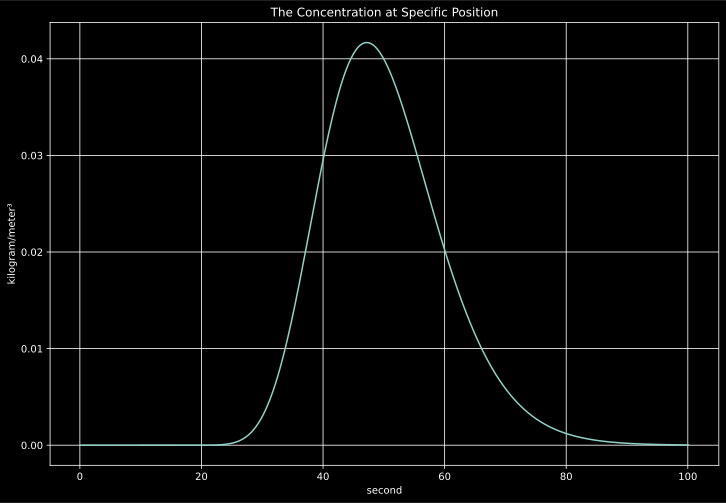

In [89]:
fig = plt.figure(figsize=(12, 8))
plt.plot(t, concentration[:, n // 2], label=f'x = {x[n // 2]}')
plt.title("The Concentration at Specific Position")
plt.grid(True)
show_plot(fig=fig)

### Plot conclusions

On the plot, the $x$-axis represents time (seconds, s), and the $y$-axis represents concentration ($\text{kg/m}^3$), ensuring that the units are physically consistent with the problem.   

This solution provides insight into how substances disperse under specific conditions and is a useful tool for estimating transport behavior in various scientific and engineering fields.  